/var/folders/21/b_d74zx567v6lvf8gnmcn52m0000gn/T/ipykernel_73853/379076270.py:10: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  response = client.get(index="document", id=document_id)


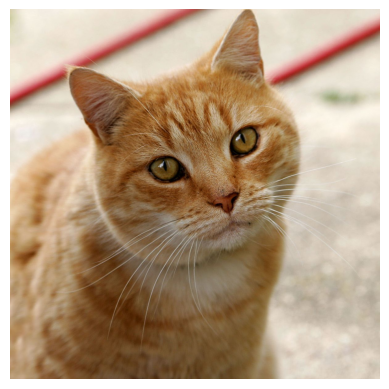

In [1]:
from elasticsearch import Elasticsearch
import base64
import matplotlib.pyplot as plt
from PIL import Image
import io

client = Elasticsearch("http://localhost:9200")

def load_document(document_id):
    response = client.get(index="document", id=document_id)
    if response.get("found", False):
        document_data = response["_source"]["document_embedding"]
        extension = response["_source"]["extension"]
        document_content = base64.b64decode(document_data)
        document = Image.open(io.BytesIO(document_content))
        plt.imshow(document)
        plt.axis('off')
        plt.show()
        
        return document
    else:
        print(f"Document with ID {document_id} not found.")
document_id_to_load = 1  # ID du document à charger
loaded_document = load_document(document_id_to_load)
